In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [3]:
import os

In [4]:
used_cars = pd.read_csv("G:/Python/usedcars.csv")

In [5]:
used_cars.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12-07-2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597,12409,NaN,NaN,21973,33619,FL,7100,0,1113
1,2,0,12-07-2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374,12791,NaN,NaN,19638,33619,FL,7600,0,1053
2,3,0,12-07-2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146,8702,NaN,NaN,19638,33619,FL,4900,0,1389
3,4,0,12-07-2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375,5518,NaN,NaN,19638,33619,FL,4100,0,630
4,5,0,12-07-2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739,7911,NaN,NaN,19638,33619,FL,4000,0,1020


In [6]:
data = used_cars.copy()
target = data.pop("IsBadBuy")

In [7]:
data[data.columns[data.dtypes !='object']].head()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,1,2006,3,1,89046,8155,9829,11636,13600,7451,8552,11597,12409,21973,33619,7100,0,1113
1,2,2004,5,1,93593,6854,8383,10897,12572,7456,9222,11374,12791,19638,33619,7600,0,1053
2,3,2005,4,2,73807,3202,4760,6943,8457,4035,5557,7146,8702,19638,33619,4900,0,1389
3,4,2004,5,1,65617,1893,2675,4658,5690,1844,2646,4375,5518,19638,33619,4100,0,630
4,5,2005,4,2,69367,3913,5054,7723,8707,3247,4384,6739,7911,19638,33619,4000,0,1020


In [8]:
target_features = data[["MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice",
                        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice","MMRCurrentAuctionCleanPrice",
                        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice", "WarrantyCost"]]

In [9]:
target_features.describe()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost
count,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000
mean,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,1276.580985
std,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,598.846788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,837.000000
50%,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,1155.000000
75%,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,1623.000000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,7498.000000


In [10]:
target_features.fillna(target_features.dropna().mean(), inplace='True').describe()

G:\Python\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,6128.909154,7373.636292,8497.035348,9850.929611,6132.081287,7390.681827,8775.723331,10145.385314,1276.580985
std,2461.689142,2722.156232,3155.896033,3385.371987,2429.308083,2680.445479,3084.025786,3303.102877,598.846788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,4273.000000,5407.000000,6281.000000,7494.000000,4285.000000,5425.000000,6550.000000,7796.000000,837.000000
50%,6098.000000,7305.000000,8446.000000,9790.000000,6076.000000,7328.000000,8753.000000,10114.000000,1155.000000
75%,7765.000000,9021.000000,10650.000000,12088.000000,7732.000000,9006.000000,10897.000000,12308.000000,1623.000000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,7498.000000


In [11]:
target_features.count()

MMRAcquisitionAuctionAveragePrice    72983
MMRAcquisitionAuctionCleanPrice      72983
MMRAcquisitionRetailAveragePrice     72983
MMRAcquisitonRetailCleanPrice        72983
MMRCurrentAuctionAveragePrice        72983
MMRCurrentAuctionCleanPrice          72983
MMRCurrentRetailAveragePrice         72983
MMRCurrentRetailCleanPrice           72983
WarrantyCost                         72983
dtype: int64

In [12]:
logreg = LogisticRegression()
logreg.fit(target_features, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logreg.coef_

array([[ -4.58503600e-04,   1.24344382e-04,   3.21345359e-04,
         -1.20529537e-04,   2.18766338e-04,  -5.96242082e-05,
         -1.06974896e-04,  -1.47830384e-04,  -1.04805251e-04]])

In [38]:
x = np.arange(1,len(target_features.columns)+1)

In [27]:
y = logreg.coef_.ravel()


In [28]:
y

array([ -4.58503600e-04,   1.24344382e-04,   3.21345359e-04,
        -1.20529537e-04,   2.18766338e-04,  -5.96242082e-05,
        -1.06974896e-04,  -1.47830384e-04,  -1.04805251e-04])

In [40]:
target_features.columns

Index(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'WarrantyCost'],
      dtype='object')

In [30]:
len(target_features.columns)

9

([<matplotlib.axis.XTick at 0x7b45310>,
 <a list of 9 Text xticklabel objects>)

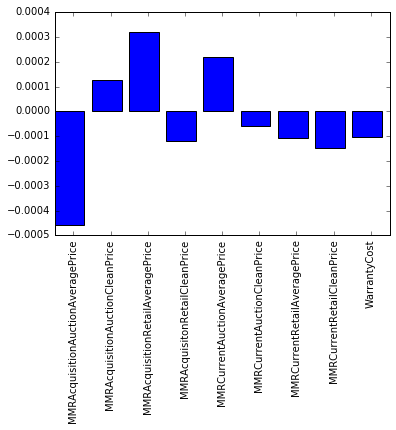

In [43]:
plt.bar(x, y)
plt.xticks(x+.5, target_features.columns, rotation =90)

In [47]:
help(logreg.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [56]:
logreg.predict(target_features.ix[0,:])

G:\Python\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)

In [55]:
target_features.ix[0,:]

MMRAcquisitionAuctionAveragePrice     8155
MMRAcquisitionAuctionCleanPrice       9829
MMRAcquisitionRetailAveragePrice     11636
MMRAcquisitonRetailCleanPrice        13600
MMRCurrentAuctionAveragePrice         7451
MMRCurrentAuctionCleanPrice           8552
MMRCurrentRetailAveragePrice         11597
MMRCurrentRetailCleanPrice           12409
WarrantyCost                          1113
Name: 0, dtype: float64